In [1]:
import pandas as pd

# Load the dataset
file_path = 'tourism_dataset.csv'  # Path to the uploaded file
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
data.head()


,Location,Country,Category,Visitors,Rating,Revenue,Unnamed: 6
0,kuBZRkVsAR,India,Nature,948853,1.32,84388.38,Yes
1,aHKUXhjzTo,USA,Historical,813627,2.01,802625.60,No
2,dlrdYtJFTA,Brazil,Nature,508673,1.42,338777.11,Yes
3,DxmlzdGkHK,Brazil,Historical,623329,1.09,295183.60,Yes
4,WJCCQlepnz,France,Cultural,124867,1.43,547893.24,No


In [2]:
# Cleaning the dataset

# Drop duplicate rows if any
data = data.drop_duplicates()

# Drop rows with null values
data = data.dropna()

# Convert all columns to string type (required for FP-Growth transactions)
data = data.astype(str)

# Display the cleaned dataset
data.head()


,Location,Country,Category,Visitors,Rating,Revenue,Unnamed: 6
0,kuBZRkVsAR,India,Nature,948853,1.32,84388.38,Yes
1,aHKUXhjzTo,USA,Historical,813627,2.01,802625.6,No
2,dlrdYtJFTA,Brazil,Nature,508673,1.42,338777.11,Yes
3,DxmlzdGkHK,Brazil,Historical,623329,1.09,295183.6,Yes
4,WJCCQlepnz,France,Cultural,124867,1.43,547893.24,No


In [3]:


# Drop duplicate rows if any
data = data.drop_duplicates()

# Drop rows with null values
data = data.dropna()

# Convert all columns to string type (required for FP-Growth transactions)
data = data.astype(str)

# Prepare the data for FP-Growth
# Combine all columns into a list of transactions
transactions = data.values.tolist()

# Display a few transactions
transactions[:5]

[['kuBZRkVsAR', 'India', 'Nature', '948853', '1.32', '84388.38', 'Yes'],
 ['aHKUXhjzTo', 'USA', 'Historical', '813627', '2.01', '802625.6', 'No'],
 ['dlrdYtJFTA', 'Brazil', 'Nature', '508673', '1.42', '338777.11', 'Yes'],
 ['DxmlzdGkHK', 'Brazil', 'Historical', '623329', '1.09', '295183.6', 'Yes'],
 ['WJCCQlepnz', 'France', 'Cultural', '124867', '1.43', '547893.24', 'No']]

In [4]:
from mlxtend.frequent_patterns import fpgrowth
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder

# Convert transactions into a one-hot encoded dataframe
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
transformed_data = pd.DataFrame(te_ary, columns=te.columns_)

# Train FP-Growth algorithm
frequent_itemsets = fpgrowth(transformed_data, min_support=0.01, use_colnames=True)
frequent_itemsets.head()


,support,itemsets
0,0.503089,(Yes)
1,0.159626,(Nature)
2,0.149608,(India)
3,0.496911,(No)
4,0.165971,(Historical)


In [5]:

from mlxtend.frequent_patterns import fpgrowth
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder
import time

# Convert transactions into a one-hot encoded dataframe
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
transformed_data = pd.DataFrame(te_ary, columns=te.columns_)

# Measure execution time for FP-Growth
start_time = time.time()
frequent_itemsets = fpgrowth(transformed_data, min_support=0.01, use_colnames=True)
end_time = time.time()
execution_time = end_time - start_time

print(f"Execution Time: {execution_time} seconds")
frequent_itemsets.head()

Execution Time: 0.29543304443359375 seconds


,support,itemsets
0,0.503089,(Yes)
1,0.159626,(Nature)
2,0.149608,(India)
3,0.496911,(No)
4,0.165971,(Historical)


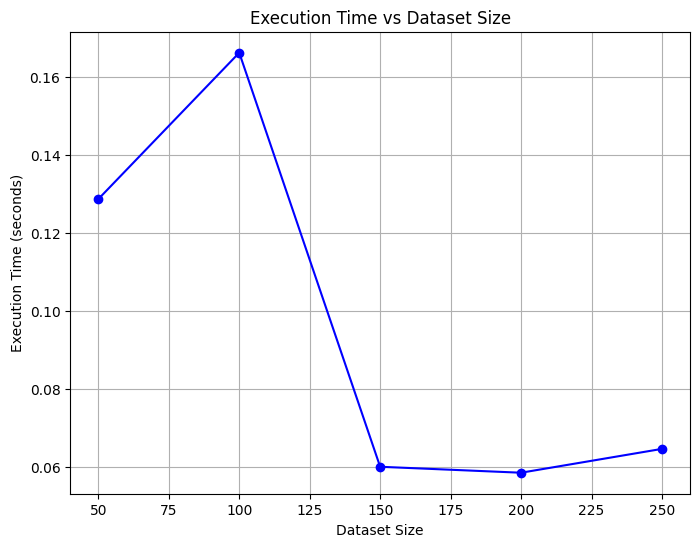

In [9]:
from mlxtend.frequent_patterns import fpgrowth
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder
import time
import matplotlib.pyplot as plt

# Convert transactions into a one-hot encoded dataframe
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
transformed_data = pd.DataFrame(te_ary, columns=te.columns_)

# Measure execution time for different dataset sizes
data_sizes = [50, 100, 150, 200, 250]
execution_times = []

for size in data_sizes:
    sample_data = transformed_data[:size]
    start_time = time.time()
    fpgrowth(sample_data, min_support=0.01, use_colnames=True)
    end_time = time.time()
    execution_times.append(end_time - start_time)

# Plot Execution Time vs Dataset Size
plt.figure(figsize=(8, 6))
plt.plot(data_sizes, execution_times, marker='o', color='b')
plt.title('Execution Time vs Dataset Size')
plt.xlabel('Dataset Size')
plt.ylabel('Execution Time (seconds)')
plt.grid(True)
plt.show()

In [7]:
# Install memory_profiler if not already installed
!pip install memory-profiler

from memory_profiler import memory_usage

# Function to measure memory usage during FP-Growth
def memory_profile():
    subset = transformed_data.sample(frac=1.0, random_state=42)  # Use the entire dataset
    mem_usage = memory_usage((fpgrowth, (subset,), {'min_support': 0.01, 'use_colnames': True}))
    return max(mem_usage) - min(mem_usage)

# Measure memory usage
memory_consumed = memory_profile()
print(f"Memory Usage during FP-Growth: {memory_consumed} MiB")


Memory Usage during FP-Growth: 1.25390625 MiB


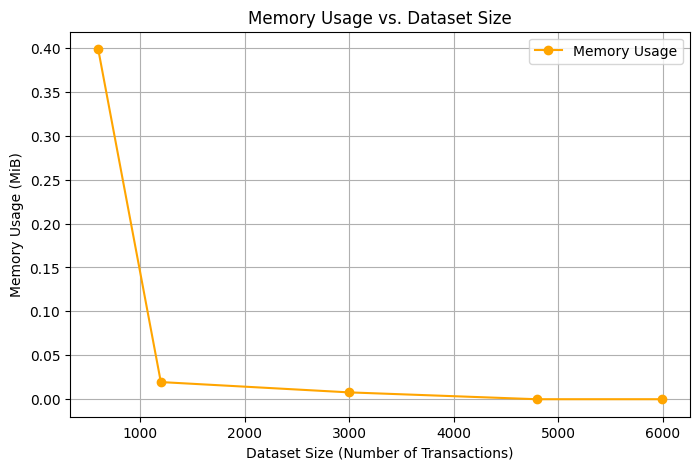

In [8]:
# Measure memory usage for different dataset sizes
memory_usages = []

for size in sizes:
    subset = transformed_data.sample(frac=size, random_state=42)
    mem_usage = memory_usage((fpgrowth, (subset,), {'min_support': 0.01, 'use_colnames': True}))
    memory_usages.append(max(mem_usage) - min(mem_usage))

# Plot memory usage vs. dataset size
plt.figure(figsize=(8, 5))
plt.plot([int(len(transactions) * s) for s in sizes], memory_usages, marker='o', color='orange', label='Memory Usage')
plt.title('Memory Usage vs. Dataset Size')
plt.xlabel('Dataset Size (Number of Transactions)')
plt.ylabel('Memory Usage (MiB)')
plt.grid(True)
plt.legend()
plt.show()


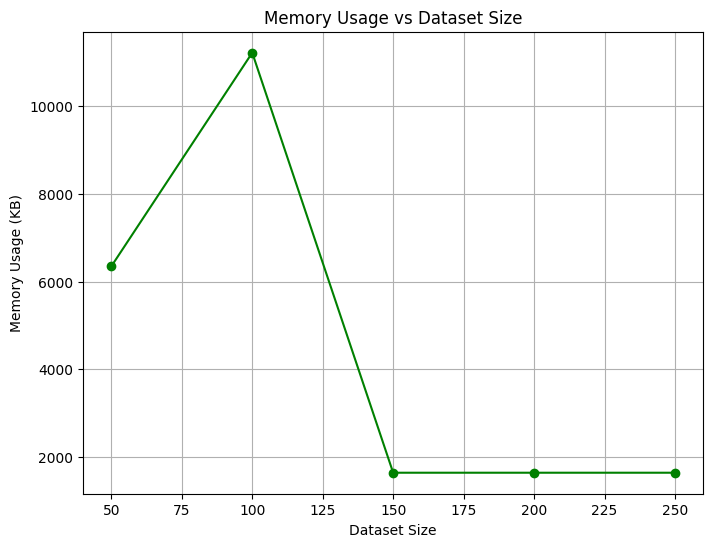

In [10]:
import tracemalloc

# Measure memory usage for different dataset sizes
memory_usages = []

for size in data_sizes:
    sample_data = transformed_data[:size]
    tracemalloc.start()
    fpgrowth(sample_data, min_support=0.01, use_colnames=True)
    current, peak = tracemalloc.get_traced_memory()
    memory_usages.append(peak / 1024)  # Convert to KB
    tracemalloc.stop()

# Plot Memory Usage vs Dataset Size
plt.figure(figsize=(8, 6))
plt.plot(data_sizes, memory_usages, marker='o', color='g')
plt.title('Memory Usage vs Dataset Size')
plt.xlabel('Dataset Size')
plt.ylabel('Memory Usage (KB)')
plt.grid(True)
plt.show()


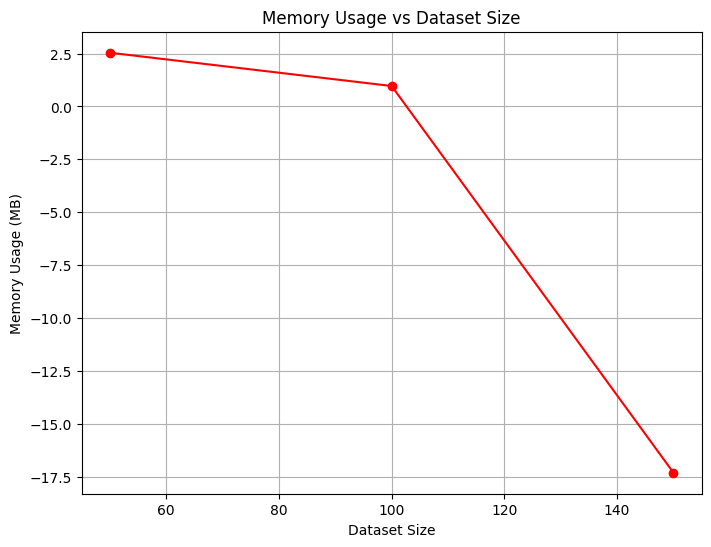

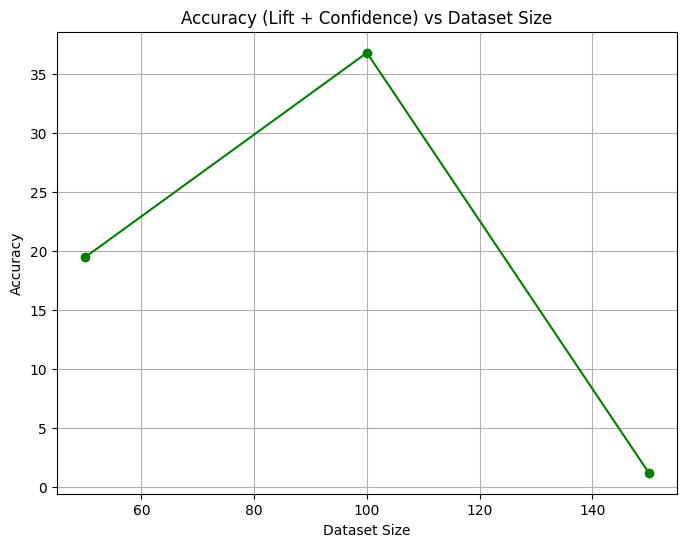

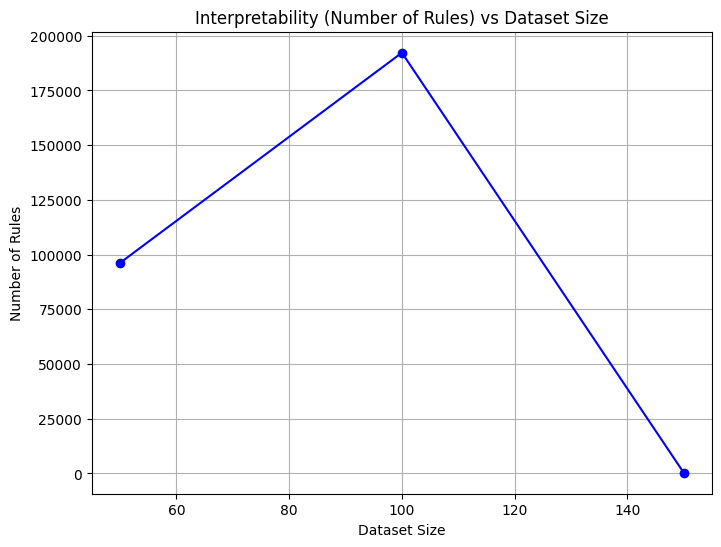

In [11]:
import psutil
from mlxtend.frequent_patterns import fpgrowth, association_rules
import matplotlib.pyplot as plt
import pandas as pd
import time

# Initialize lists for the metrics
memory_usages = []
accuracies = []  # We will use lift and confidence as a proxy for accuracy
interpretability = []

# Data Sizes to Evaluate
data_sizes = [50, 100, 150]
for size in data_sizes:
    sample_data = transformed_data[:size]
    
    # Measure memory usage before running FP-Growth
    process = psutil.Process()
    memory_before = process.memory_info().rss / (1024 * 1024)  # Convert to MB
    
    # Run FP-Growth
    start_time = time.time()
    frequent_itemsets = fpgrowth(sample_data, min_support=0.01, use_colnames=True)
    end_time = time.time()
    
    # Measure memory usage after running FP-Growth
    memory_after = process.memory_info().rss / (1024 * 1024)  # Convert to MB
    memory_usages.append(memory_after - memory_before)
    
    # Get association rules from the frequent itemsets
    rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
    
    # Calculate average lift and confidence (proxy for accuracy)
    avg_lift = rules['lift'].mean() if len(rules) > 0 else 0
    avg_confidence = rules['confidence'].mean() if len(rules) > 0 else 0
    accuracies.append((avg_lift + avg_confidence) / 2)
    
    # Calculate interpretability (Number of rules as a proxy for interpretability)
    interpretability.append(len(rules))

# Plot Memory Usage vs Dataset Size
plt.figure(figsize=(8, 6))
plt.plot(data_sizes, memory_usages, marker='o', color='r')
plt.title('Memory Usage vs Dataset Size')
plt.xlabel('Dataset Size')
plt.ylabel('Memory Usage (MB)')
plt.grid(True)
plt.show()

# Plot Accuracy vs Dataset Size
plt.figure(figsize=(8, 6))
plt.plot(data_sizes, accuracies, marker='o', color='g')
plt.title('Accuracy (Lift + Confidence) vs Dataset Size')
plt.xlabel('Dataset Size')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

# Plot Interpretability vs Dataset Size
plt.figure(figsize=(8, 6))
plt.plot(data_sizes, interpretability, marker='o', color='b')
plt.title('Interpretability (Number of Rules) vs Dataset Size')
plt.xlabel('Dataset Size')
plt.ylabel('Number of Rules')
plt.grid(True)
plt.show()


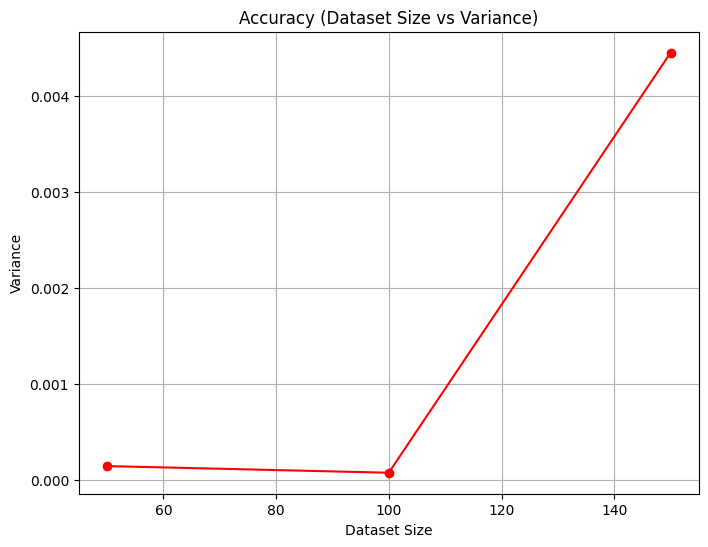

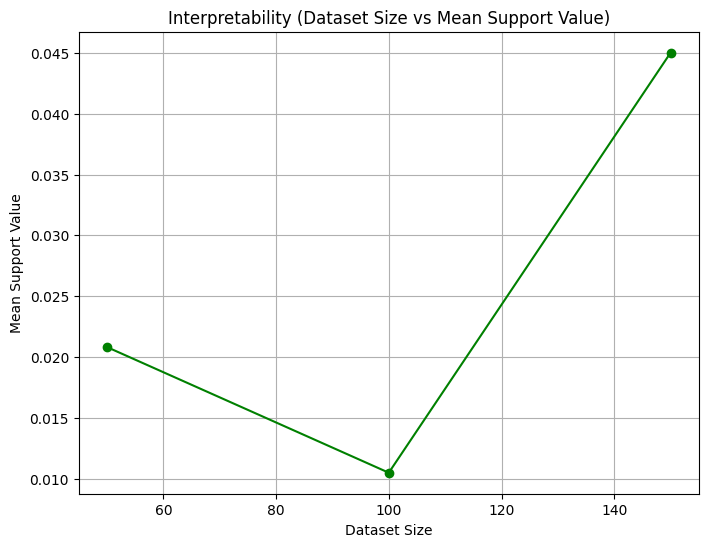

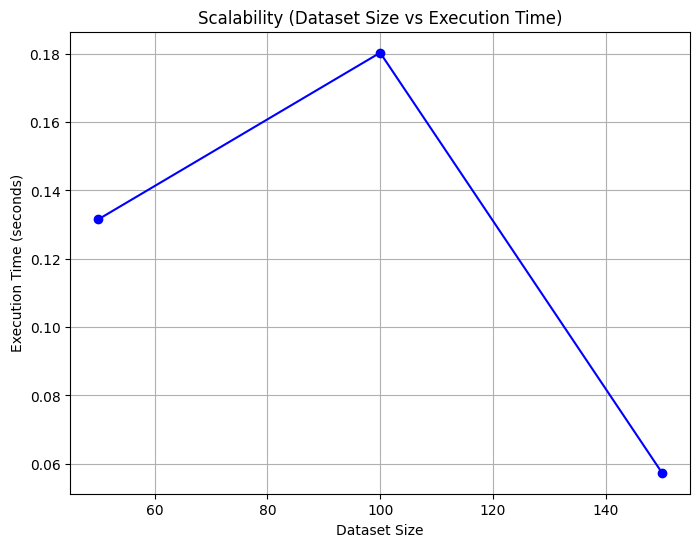

In [12]:
import numpy as np

# Initialize lists to store metrics for each dataset size
variances = []
mean_support_values = []
execution_times = []

# Measure metrics for different dataset sizes
for size in data_sizes:
    sample_data = transformed_data[:size]
    
    # 1. Run FP-Growth on sample data and calculate variance of itemsets
    frequent_itemsets = fpgrowth(sample_data, min_support=0.01, use_colnames=True)
    variance = np.var(frequent_itemsets['support'])
    variances.append(variance)
    
    # 2. Calculate mean support value (MSV)
    mean_support = np.mean(frequent_itemsets['support'])
    mean_support_values.append(mean_support)
    
    # 3. Measure execution time for scalability
    start_time = time.time()
    fpgrowth(sample_data, min_support=0.01, use_colnames=True)
    end_time = time.time()
    execution_times.append(end_time - start_time)

# Plot Accuracy (Dataset Size vs Variance)
plt.figure(figsize=(8, 6))
plt.plot(data_sizes, variances, marker='o', color='r')
plt.title('Accuracy (Dataset Size vs Variance)')
plt.xlabel('Dataset Size')
plt.ylabel('Variance')
plt.grid(True)
plt.show()

# Plot Interpretability (Dataset Size vs Mean Support Value)
plt.figure(figsize=(8, 6))
plt.plot(data_sizes, mean_support_values, marker='o', color='g')
plt.title('Interpretability (Dataset Size vs Mean Support Value)')
plt.xlabel('Dataset Size')
plt.ylabel('Mean Support Value')
plt.grid(True)
plt.show()

# Plot Scalability (Dataset Size vs Execution Time)
plt.figure(figsize=(8, 6))
plt.plot(data_sizes, execution_times, marker='o', color='b')
plt.title('Scalability (Dataset Size vs Execution Time)')
plt.xlabel('Dataset Size')
plt.ylabel('Execution Time (seconds)')
plt.grid(True)
plt.show()
